<a href="https://colab.research.google.com/github/MAHESWARI-ROUT/Task-1_CodeAlpha/blob/main/CreditScrollingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasist
!pip install category_encoders
!pip install imbalanced-learn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import string
import os

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re

# Outlier removal
from sklearn.base import BaseEstimator, TransformerMixin
%matplotlib inline
matplotlib.rc(("xtick", "ytick", "text"), c="k")
matplotlib.rc("figure", dpi=80)

# Modeling and evaluation
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier,
    AdaBoostClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
import joblib

# Packages options
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
train_df = pd.read_csv("/content/train.csv.zip", low_memory=False)
train_df["is_train"] = True
test_df = pd.read_csv("/content/test.csv.zip", low_memory=False)
test_df["is_train"] = False

df = pd.concat([train_df, test_df])

In [3]:
df.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'is_train'],
      dtype='object')

In [4]:
df.drop(["Name", "SSN", "ID"], axis=1, inplace=True, errors="ignore")
# Change dtype for specific columns
columns_to_convert = ["Month", "Occupation", "Type_of_Loan", "Credit_History_Age", "Payment_Behaviour"]
df[columns_to_convert] = df[columns_to_convert].astype("category")

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Customer_ID               150000 non-null  object  
 1   Month                     150000 non-null  category
 2   Age                       150000 non-null  object  
 3   Occupation                150000 non-null  category
 4   Annual_Income             150000 non-null  object  
 5   Monthly_Inhand_Salary     127500 non-null  float64 
 6   Num_Bank_Accounts         150000 non-null  int64   
 7   Num_Credit_Card           150000 non-null  int64   
 8   Interest_Rate             150000 non-null  int64   
 9   Num_of_Loan               150000 non-null  object  
 10  Type_of_Loan              132888 non-null  category
 11  Delay_from_due_date       150000 non-null  int64   
 12  Num_of_Delayed_Payment    139500 non-null  object  
 13  Changed_Credit_Limit      150000 no

In [6]:
df.describe()


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,147000.000000,150000.000000,150000.000000
mean,4190.115139,17.006940,22.623447,71.234907,21.063400,28.529014,32.283309,1432.513579
std,3180.489657,117.069476,129.143006,461.537193,14.860154,194.456058,5.113315,8403.759977
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,3.000000,28.054731,30.947775
50%,3091.000000,6.000000,5.000000,13.000000,18.000000,6.000000,32.297058,71.280006
75%,5948.454596,7.000000,7.000000,20.000000,28.000000,9.000000,36.487954,166.279555
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2597.000000,50.000000,82398.000000


In [7]:
df.duplicated().sum()


0

In [8]:
df.isna().sum()


Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
is_train                        0
dtype: int64

In [9]:
df.describe(exclude=np.number).T


,count,unique,top,freq
Customer_ID,150000,12500,CUS_0xd40,12
Month,150000,12,April,12500
Age,150000,2524,39,4198
Occupation,150000,16,_______,10500
Annual_Income,150000,21192,36585.12,24
Num_of_Loan,150000,623,3,21500
Type_of_Loan,132888,6260,Not Specified,2112
Num_of_Delayed_Payment,139500,1058,19,7949
Changed_Credit_Limit,150000,4605,_,3150
Credit_Mix,150000,4,Standard,54858


In [10]:
def get_unique_values(df):
    cat_cols = df.select_dtypes("object").columns

    data_info = np.zeros((len(cat_cols), 5), dtype="object")
    for i, col in enumerate(cat_cols):
        if len(df[col].unique()) > 5000:
            continue
        else:
            unique_values, counts = np.unique(
                np.array(df[col], dtype=str), return_counts=True)
            num_of_uv = len(unique_values)
            unique_val_percent = np.round(counts / counts.sum(), 2)
            data_info[i, :] = [col, unique_values.tolist(
            ), counts.tolist(), num_of_uv, unique_val_percent]
    return pd.DataFrame(data_info, columns=["column", "unique", "counts", "len_unique_values", "%_unique_values"])

In [11]:
unique_values_df = get_unique_values(df)
unique_values_df.head()


,column,unique,counts,len_unique_values,%_unique_values
0,0,0,0,0,0
1,Age,"[-500, 100, 1004, 1006, 1007, 1010, 1018_, 102...","[1350, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2524,"[0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,0,0,0,0,0
3,Num_of_Loan,"[-100, 0, 0_, 1, 100, 1001, 1002, 1006, 1008, ...","[5850, 15543, 833, 15112, 1, 1, 1, 1, 1, 1, 1,...",623,"[0.04, 0.1, 0.01, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,Num_of_Delayed_Payment,"[-1, -1_, -2, -2_, -3, -3_, 0, 0_, 1, 10, 100,...","[431, 12, 326, 17, 140, 5, 2352, 68, 2400, 767...",1059,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.02..."


In [12]:
class DataProcessor:
    def __init__(self, groupby, data_frame):
        self.groupby = groupby
        self.df = data_frame

    def get_month(self, x):
     if not pd.isnull(x):
         year_month = re.findall(r"\d+", x)
         months = (int(year_month[0])*12) + np.int64(year_month[-1])
         return months
     else:
         x

    @staticmethod
    def get_numbers(text):
        digits = re.findall(r'\d+', str(text))
        digits = ','.join(digits)
        return digits

    @staticmethod
    def replace_special_character(text):
        if "NM" in str(text):
            return "No"
            if "payments" in str(text) or "_" not in str(text):
               return text
        clean_text = str(text).replace("_", "")
        return np.nan if clean_text == "nan" else clean_text

    @staticmethod
    def preprocess_text(texts:str) -> tuple[dict, list[list[str]]]:
        dictionary = {}
        tokens = [str(text).lower().replace("and", "").split(",") for text in texts]
        tokens = [[token.strip() for token in token_list if token not in string.punctuation] for token_list in tokens]
        for token_list in tokens:
            for token in token_list:
                if token not in dictionary:
                    size = len(dictionary)
                    dictionary[token] = size
        return (dictionary, ["|".join(words) for words in tokens])


    @staticmethod
    def fill_na(df: pd.DataFrame, groupby=None):
       cat_features = df.select_dtypes(exclude="number").columns.drop(
            ["Type_of_Loan", "is_train"])
       num_features = df.select_dtypes(include="number").columns
       df["Type_of_Loan"].fillna("not specified", inplace=True)
       if "Credit_Score" in df.columns:
            cat_features = cat_features.drop("Credit_Score")

        # Replacing Categorial Columns with Mode
       def fill_na_cat(df):
           df[cat_features] = df.groupby(groupby)[cat_features].transform(
               lambda x: x.fillna(x.mode()[0]))
           return df

        # Replacing Numerical Columns with Median
       def fill_na_num(df):
           df[num_features] = df.groupby(groupby)[num_features].transform(
               lambda x: x.mask(x < 0, np.nan).fillna(x.median()))
           return df

       df = fill_na_cat(df)
       df = fill_na_num(df)
       return df
    def preprocess(self):
      # Age
        self.df['Age'] = self.df.Age.apply(DataProcessor.get_numbers)
        # Handle Special Characters
        self.df = self.df.applymap(DataProcessor.replace_special_character)
        self.df = self.df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
        # Credit Mix
        self.df["Credit_Mix"] = self.df.groupby(self.groupby)["Credit_Mix"].transform(lambda x: x.replace("", x.mode()[0]))
        # Payment Behaviour
        self.df["Payment_Behaviour"] = self.df.groupby(self.groupby)["Payment_Behaviour"].transform(
            lambda x: x.replace("!@9#%8", x.mode()[0])
        )
        self.df["Payment_Behaviour"] = self.df["Payment_Behaviour"].transform(
            lambda x: x.replace("!@9#%8", x.mode()[0])
        )
        # Type of Loan
        self.df["Type_of_Loan"] = self.df[["Type_of_Loan"]].apply(lambda x:  DataProcessor.preprocess_text(x.values)[-1])
        self.df["Type_of_Loan"] = self.df["Type_of_Loan"].str.replace(" ", "_").str.replace("|", " ").replace("nan", np.nan)
        # Credit History Age
        self.df["Credit_History_Age"] = self.df["Credit_History_Age"].apply(lambda x: self.get_month(x))
        # Monthly Balance
        self.df["Monthly_Balance"] = pd.to_numeric(self.df.Monthly_Balance, errors="coerce")
        # Replacing account balances less than zero with zero
        self.df.loc[self.df["Num_Bank_Accounts"] < 0, "Num_Bank_Accounts"] = 0
        # Replace "nan" values in the 'Type_of_Loan' column with NaN for consistency
        self.df.loc[self.df["Type_of_Loan"] == "nan", "Type_of_Loan"] = np.nan
        # Replace "nan" values in the 'Occupation' column with NaN for consistency
        self.df.loc[self.df["Occupation"] == "", "Occupation"] = np.nan
        self.df.loc[self.df["Occupation"] == "_______", "Occupation"] = np.nan
        # Replace "nan" values in the 'Credit_Mix' column with NaN for consistency
        self.df.loc[self.df["Credit_Mix"] == "", "Credit_Mix"] = np.nan

        # Negetive Numbers
        self.df['Num_of_Delayed_Payment'] = pd.to_numeric(self.df['Num_of_Delayed_Payment'], errors='coerce')

        self.df.loc[self.df['Num_of_Delayed_Payment'] < 0, 'Num_of_Delayed_Payment'] = np.nan
        self.df.loc[self.df['Delay_from_due_date'] <0, 'Delay_from_due_date'] = np.nan
         # Filling missing values
        self.df = DataProcessor.fill_na(self.df, "Customer_ID")

        return self.df

In [13]:
preprocesor = DataProcessor("Customer_ID", df)
new_df=preprocesor.preprocess()

TypeError: expected string or bytes-like object

In [14]:
new_df.isna().sum()


Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
is_train                        0
dtype: int64

In [15]:
new_df[new_df.isna().any(axis=1)]


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,is_train
0,CUS0xd40,September,23,Scientist,19114.12,1824.843333,3,4,3,4.0,...,809.98,35.030402,273.0,No,49.574949,236.642682,LowspentSmallvaluepayments,186.266702,NaN,False
1,CUS0xd40,October,24,Scientist,19114.12,1824.843333,3,4,3,4.0,...,809.98,33.053114,274.0,No,49.574949,21.465380,HighspentMediumvaluepayments,361.444004,NaN,False
2,CUS0xd40,November,24,Scientist,19114.12,1824.843333,3,4,3,4.0,...,809.98,33.811894,270.0,No,49.574949,148.233938,LowspentMediumvaluepayments,264.675446,NaN,False
3,CUS0xd40,December,24,Scientist,19114.12,1824.843333,3,4,3,4.0,...,809.98,32.430559,276.0,No,49.574949,39.082511,HighspentMediumvaluepayments,343.826873,NaN,False
4,CUS0x21b1,September,28,Teacher,34847.84,3037.986667,2,4,6,1.0,...,605.03,25.926822,327.0,No,18.816215,39.684018,HighspentLargevaluepayments,485.298434,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CUS0x8600,December,4975,Architect,20002.88,1929.906667,10,8,29,5.0,...,3571.70,34.780553,72.5,Yes,60.964772,146.486325,LowspentSmallvaluepayments,275.539570,NaN,False
49996,CUS0x942c,September,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,502.38,27.758522,383.0,No,35.104023,181.442999,LowspentSmallvaluepayments,409.394562,NaN,False
49997,CUS0x942c,October,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,502.38,36.858542,384.0,No,35.104023,10000.000000,LowspentLargevaluepayments,349.726332,NaN,False
49998,CUS0x942c,November,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,502.38,39.139840,385.0,No,35.104023,97.598580,HighspentSmallvaluepayments,463.238981,NaN,False


In [16]:
class ClipOutliersTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,
                 lower_quantile,
                 upper_quantile,
                 multiply_by=1.5,
                 replace_with_median: bool = False):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile
        self.multiply_by = multiply_by
        self.replace_with_median = replace_with_median

        self.lower_limit = 0
        self.upper_limit = 0
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        q1, q3 = np.quantile(X, [self.lower_quantile, self.upper_quantile])
        iqr = q3 - q1
        self.lower_limit = q1 - (self.multiply_by * iqr)
        self.upper_limit = q3 + (self.multiply_by * iqr)
        return self

    def transform(self, X):
      if self.replace_with_median:
            return np.where(
                ((X >= self.lower_limit) & (X <= self.upper_limit)), X,
                np.median(X))
      else:
            return np.clip(X, self.lower_limit, self.upper_limit)


def get_skewness(df, lower=None, upper=None):
    columns = df.columns
    skewness: pd.Series = df[columns].skew()
    highly_skewed = skewness[(skewness <= lower) |
                             (skewness >= upper)].index.to_list()
    lowly_skewed = skewness[(skewness > lower)
                            & (skewness < upper)].index.to_list()
    return (highly_skewed, lowly_skewed)


def remove_outliers(df: pd.DataFrame):
    category = df.select_dtypes(exclude="number").columns.drop(
        ["Credit_Score", "is_train"])
    numbers = df.select_dtypes(include="number").columns

    highly_skewed, lowly_skewed = get_skewness(df[numbers],
                                               lower=-0.8,upper=0.8)
    df[highly_skewed] = df[highly_skewed].apply(
        lambda x: ClipOutliersTransformer(
            0.25, 0.75, multiply_by=1.5, replace_with_median=True).
        fit_transform(x))

    df[lowly_skewed] = df[lowly_skewed].apply(
        lambda x: ClipOutliersTransformer(
            0.25, 0.75, multiply_by=1.5, replace_with_median=False).
        fit_transform(x))
    return df


In [17]:
new_df = remove_outliers(new_df)


In [18]:
new_df.to_csv("new.csv", index=False)

In [19]:
# Visualization Super Class
def make_boxplot(df, column, ax):
    sns.boxplot(x="Credit_Score", y=column, data=df, ax=ax, width=0.8, palette="Set2")
    plt.xticks(rotation=90)
    # add the five number summary to the plot
    plt.title(column, fontdict={"fontsize": 15})
    plt.xticks(rotation=0)

def plot_boxplot_num_cols(df):
    fig = plt.figure(figsize=(18, 18), dpi=300)
    numb_columns = df.select_dtypes(include="number").columns
    for column in numb_columns:
        ax = fig.add_subplot(5, 4, list(numb_columns).index(column)+1)
        make_boxplot(df, column, ax)
        plt.tight_layout(pad=0.3)
    plt.tight_layout()
    plt.show()

# Define function to create histograms for all numeric features
def plot_histograms(df):
    numeric_cols = df.select_dtypes(include=np.number).columns
    num_cols = len(numeric_cols)
    num_plots_per_row = 3
    num_rows = (num_cols // num_plots_per_row) + (num_cols % num_plots_per_row > 0)
    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 10))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

        if i >= num_cols - 1:
            for j in range(i + 1, len(axes)):
                axes[j].remove()
            break

    plt.tight_layout()
    plt.show()

# Define function to create Distribution plot for all numeric features
def plot_distribution_plots(df):
    numeric_cols = df.select_dtypes(include=np.number).columns
    num_cols = len(numeric_cols)
    num_plots_per_row = 3
    num_rows = (num_cols // num_plots_per_row) + (num_cols % num_plots_per_row > 0)
    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 10))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols):
        sns.distplot(df[col], bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')

        if i >= num_cols - 1:
            for j in range(i + 1, len(axes)):
                axes[j].remove()
            break

    plt.tight_layout()
    plt.show()

def make_countplot(df: pd.DataFrame):
    cat_cols = df.select_dtypes(exclude="number").columns.drop(
        ['Credit_Score','Customer_ID', "Type_of_Loan"])
    cat_cols = list(cat_cols)
    cat_cols.pop(-1)
    cat_cols.insert(-2, "Payment_Behaviour")

    fig, axes = plt.subplots(figsize=(12, 12), dpi=300)
    fig.suptitle("Counts of categorical columns")
    axes.grid(visible=False)
    axes.xaxis.set_tick_params(labelbottom=False)
    axes.yaxis.set_tick_params(labelleft=False)

    def __plot_graph(df, col, ax: plt.Axes, legend=False):
        sns.countplot(
            data=df,
            x=col,
            ax=ax,
            hue="Credit_Score",
        )
        # label =ax.get_xlabel()
        ax.set_xlabel(col, fontdict={"size": 9})
        ax.set_title(f"by {col}", fontdict={"size": 9})
        ax.get_xticklabels()
        ax.tick_params(labelsize=7, axis="y")
        ax.set_xticklabels(ax.get_xticklabels(),
                           rotation=90,
                           fontdict=dict(size=7))
        ax.grid(False)
        if legend:
            ax.legend(shadow=True,
                      loc="best",
                      facecolor="inherit",frameon=True)
        else:
            ax.legend_ = None
        plt.tight_layout(w_pad=1)

    for i, col in enumerate(cat_cols, 1):
        if i == 3:
            continue
        ax = fig.add_subplot(2, 3, i)
        __plot_graph(df, col=col, ax=ax)

    ax2 = fig.add_axes((0.74, 0.527, 0.23, 0.35))
    __plot_graph(df, col="Payment_Behaviour", ax=ax2, legend=True)
    plt.show(True)

def plot_correlation_matrix(data):
    corr = data.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig = plt.figure(figsize=(10, 10), dpi=150)

    sns.heatmap(corr, annot=True, mask=mask, fmt=".0%", annot_kws={"size":10})
    plt.grid(False)
    plt.tick_params(axis="both", labelsize=5)
    plt.tight_layout()
    plt.title("Correlation Matrix")
    plt.show()


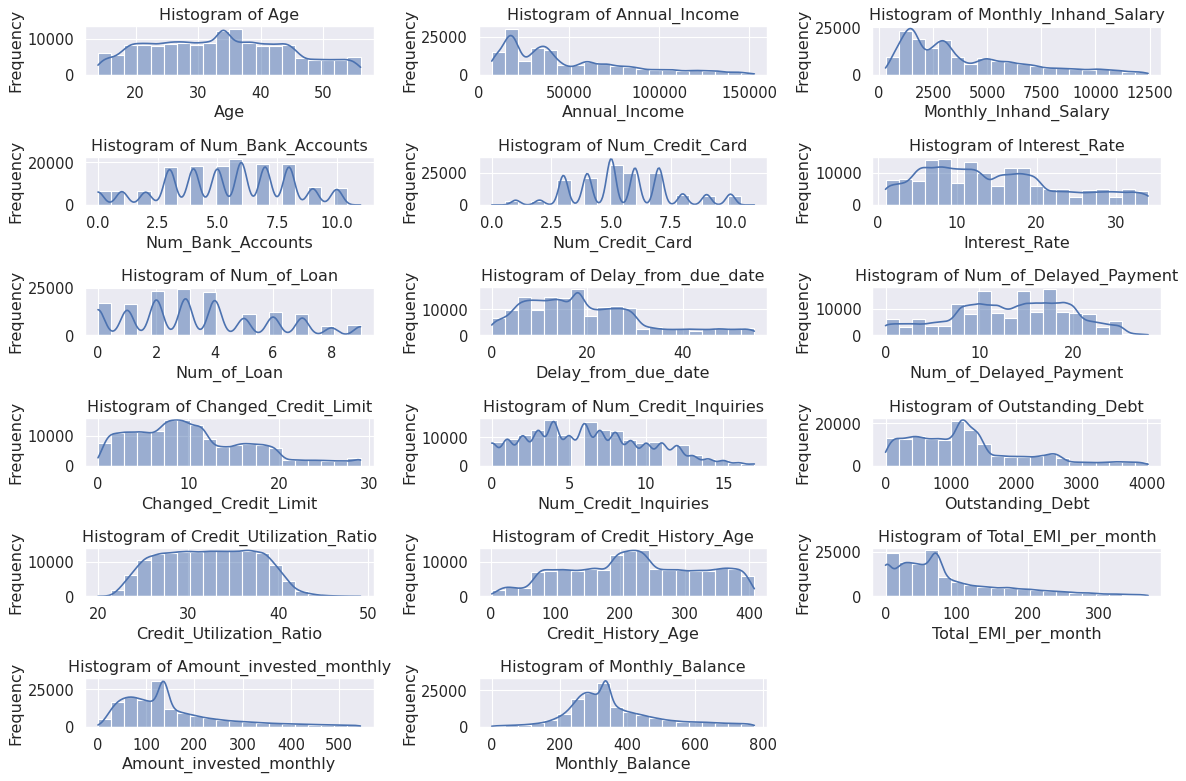

In [20]:
 plot_histograms(new_df)


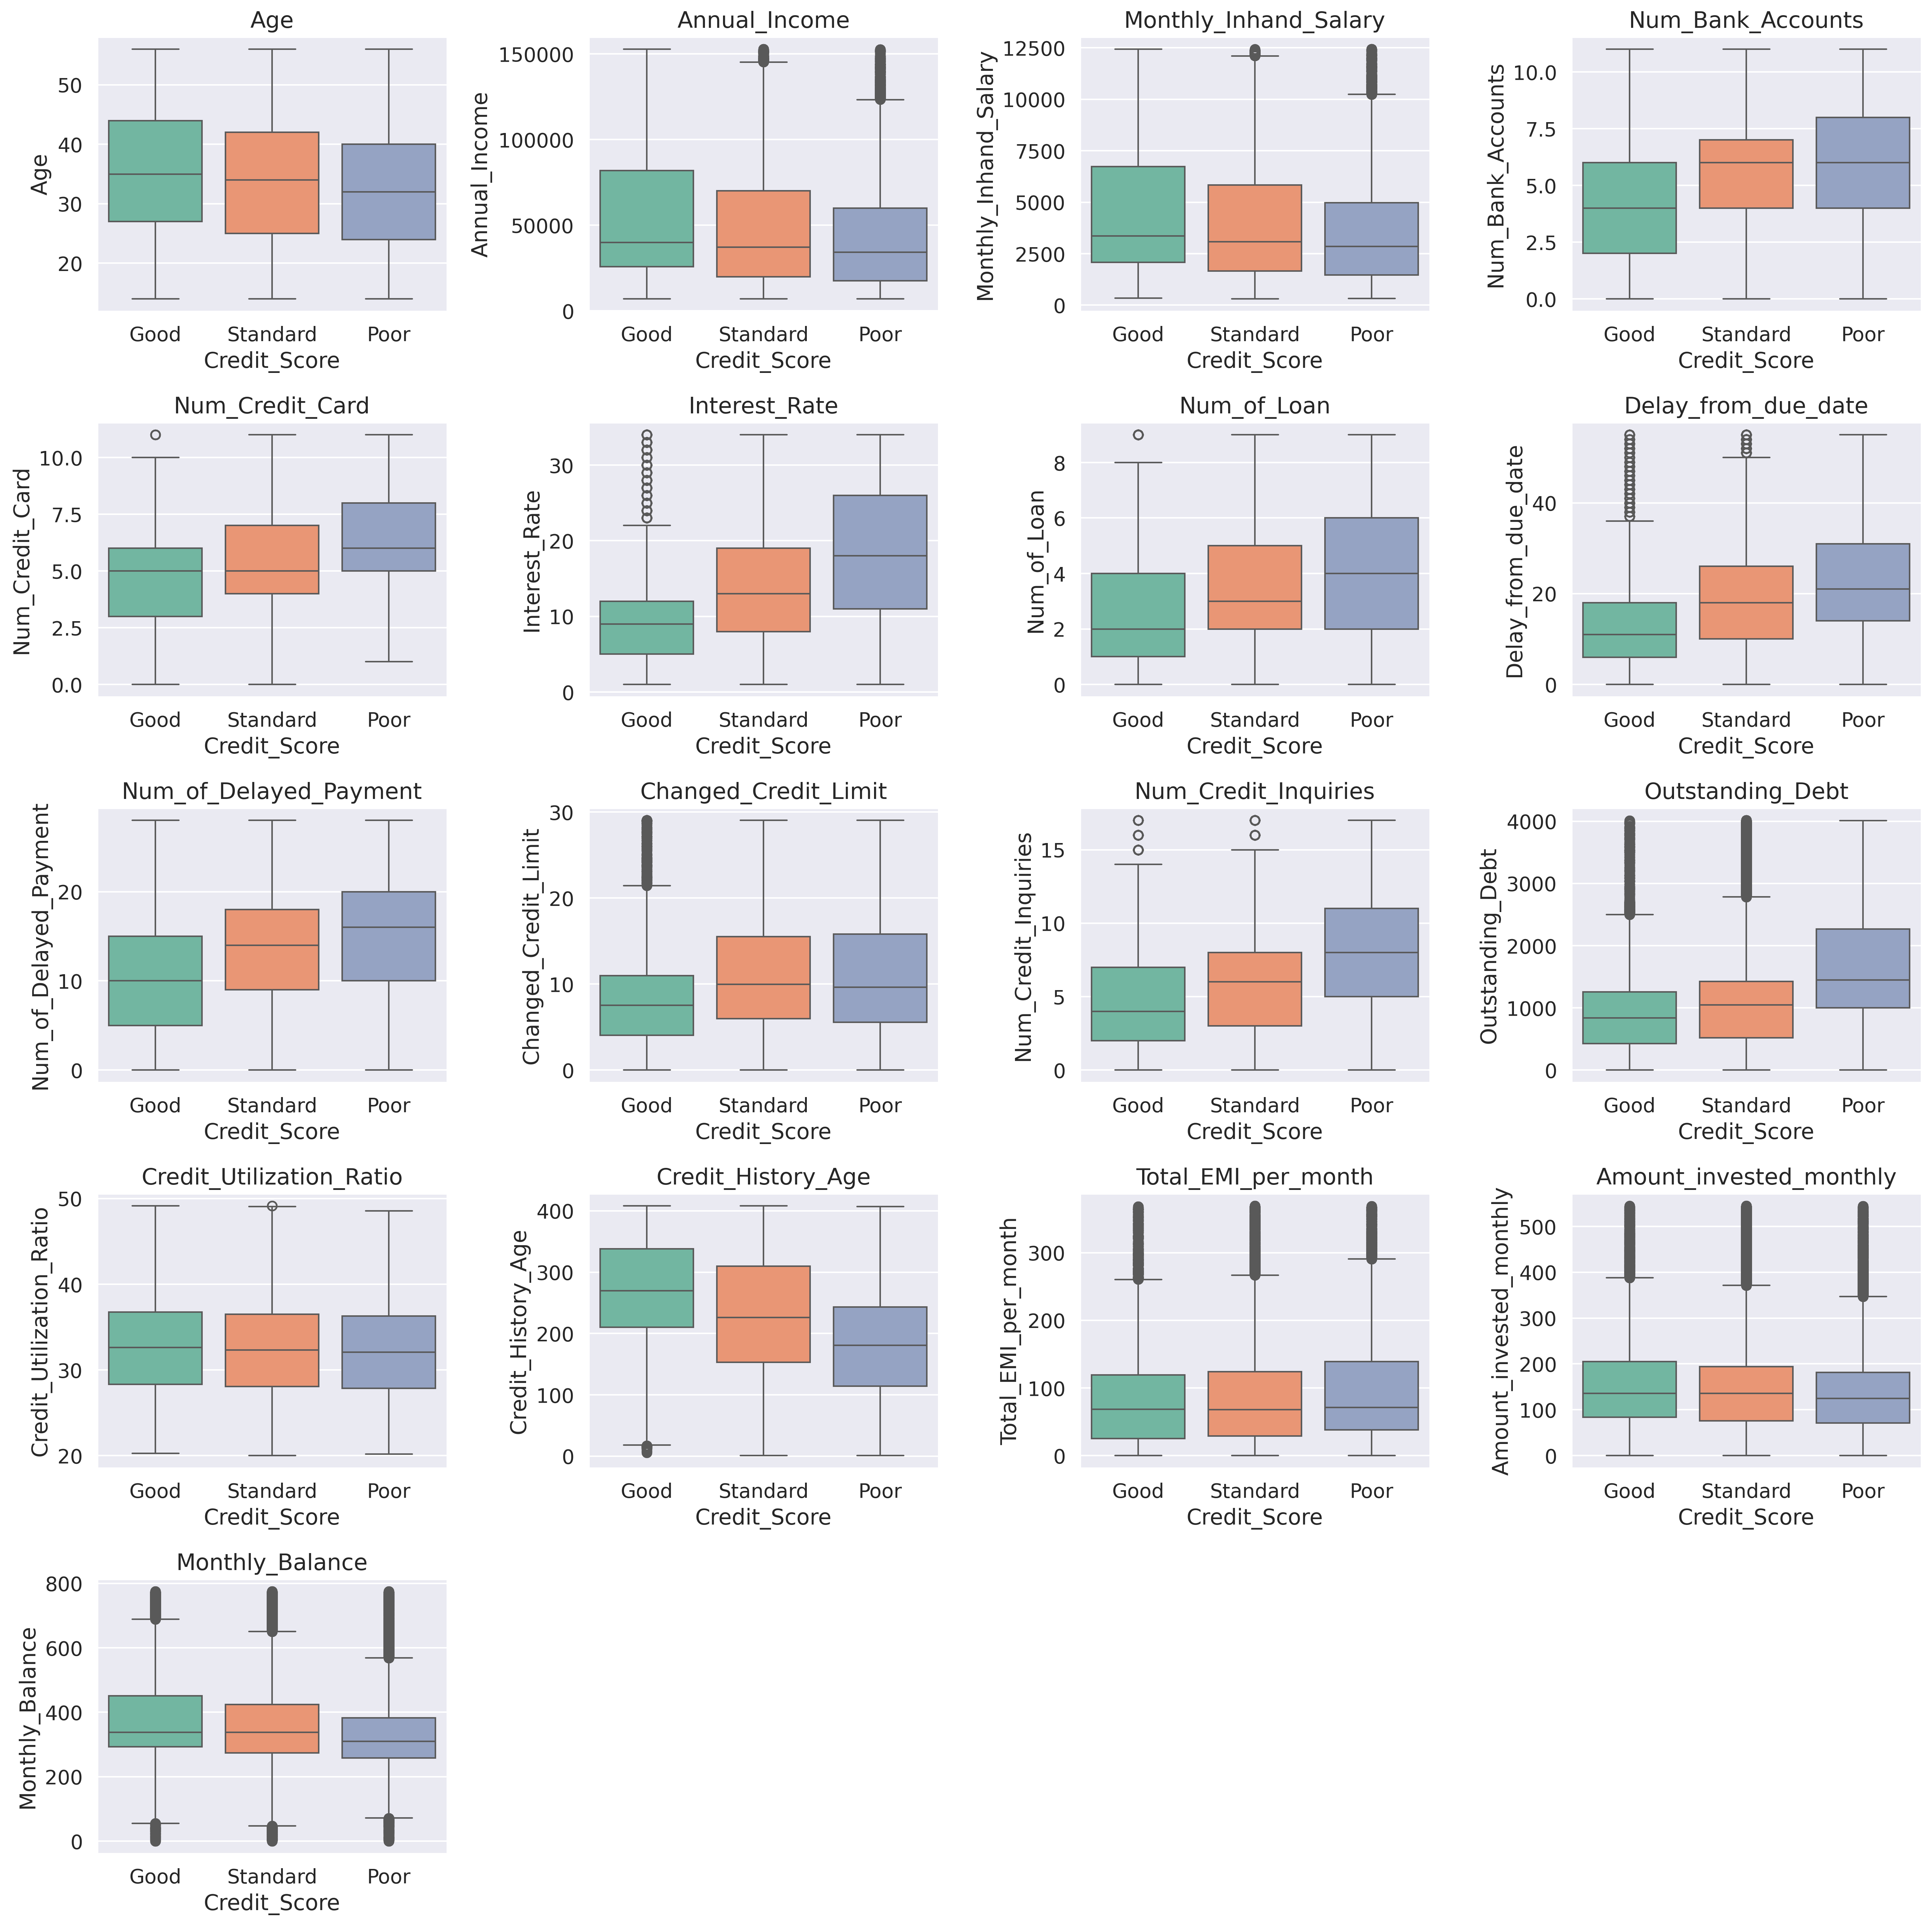

In [21]:
plot_boxplot_num_cols(new_df)


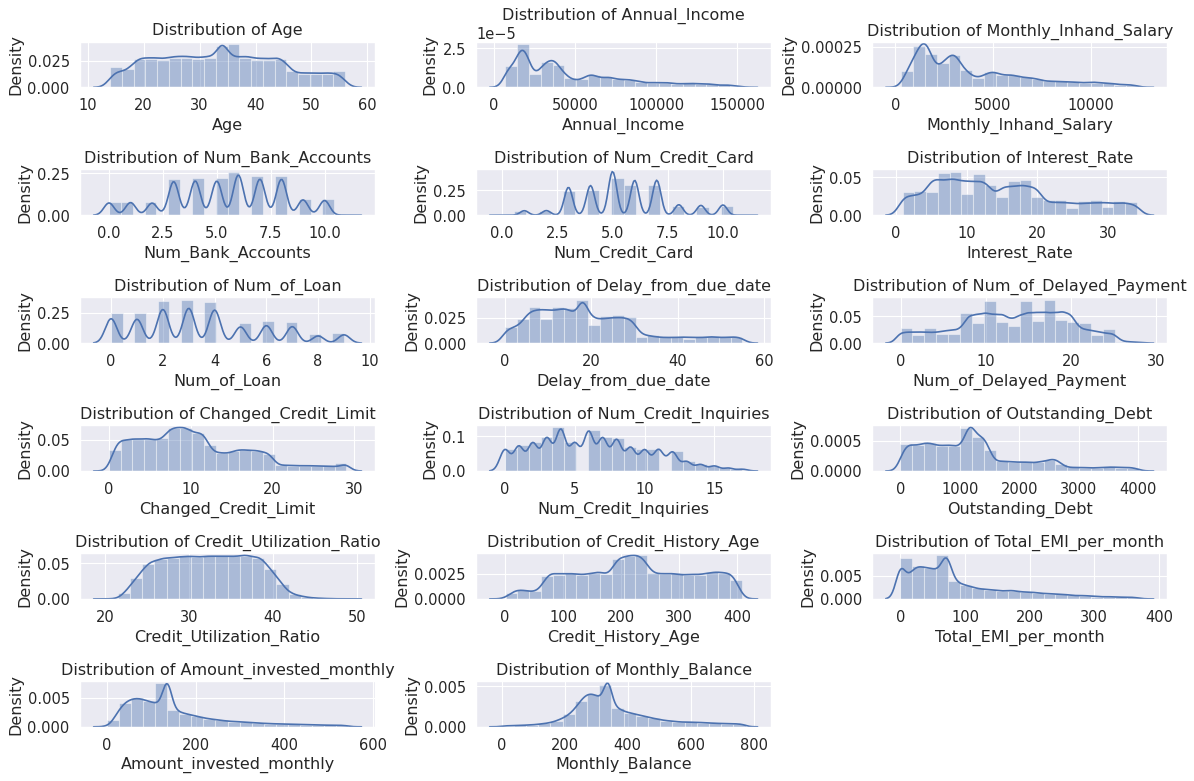

In [22]:
plot_distribution_plots(new_df)


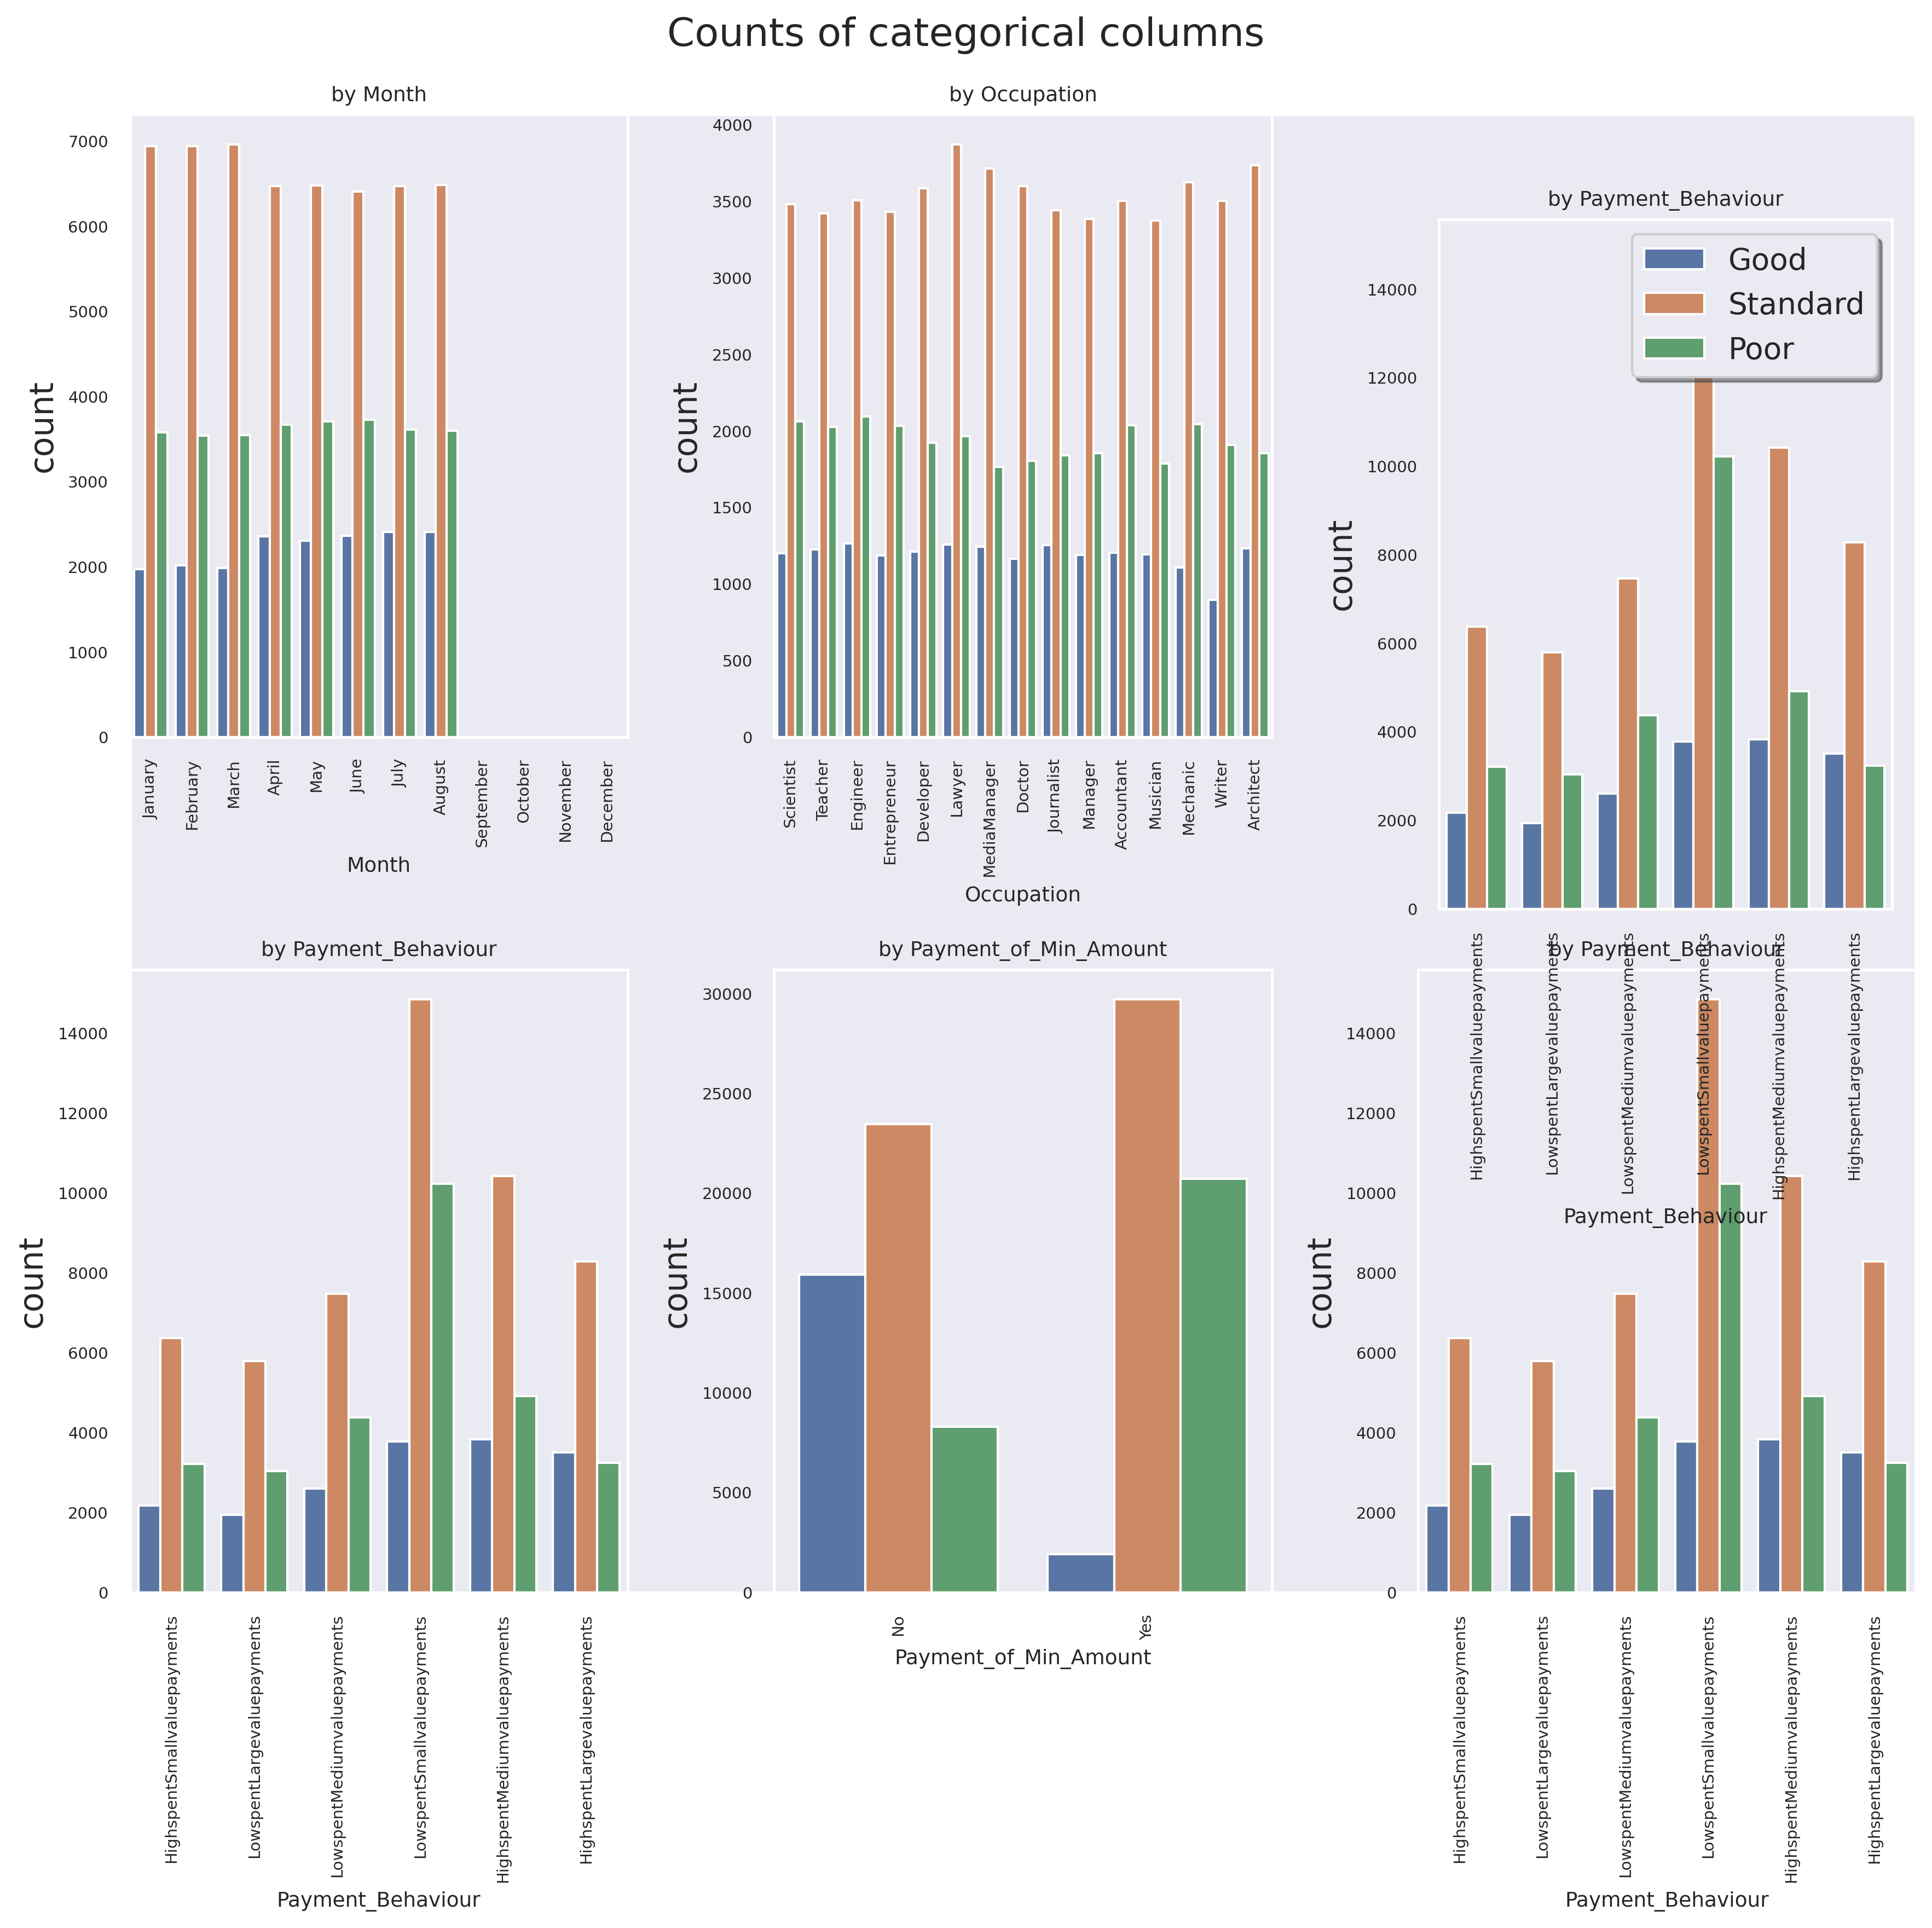

In [23]:
make_countplot(new_df)


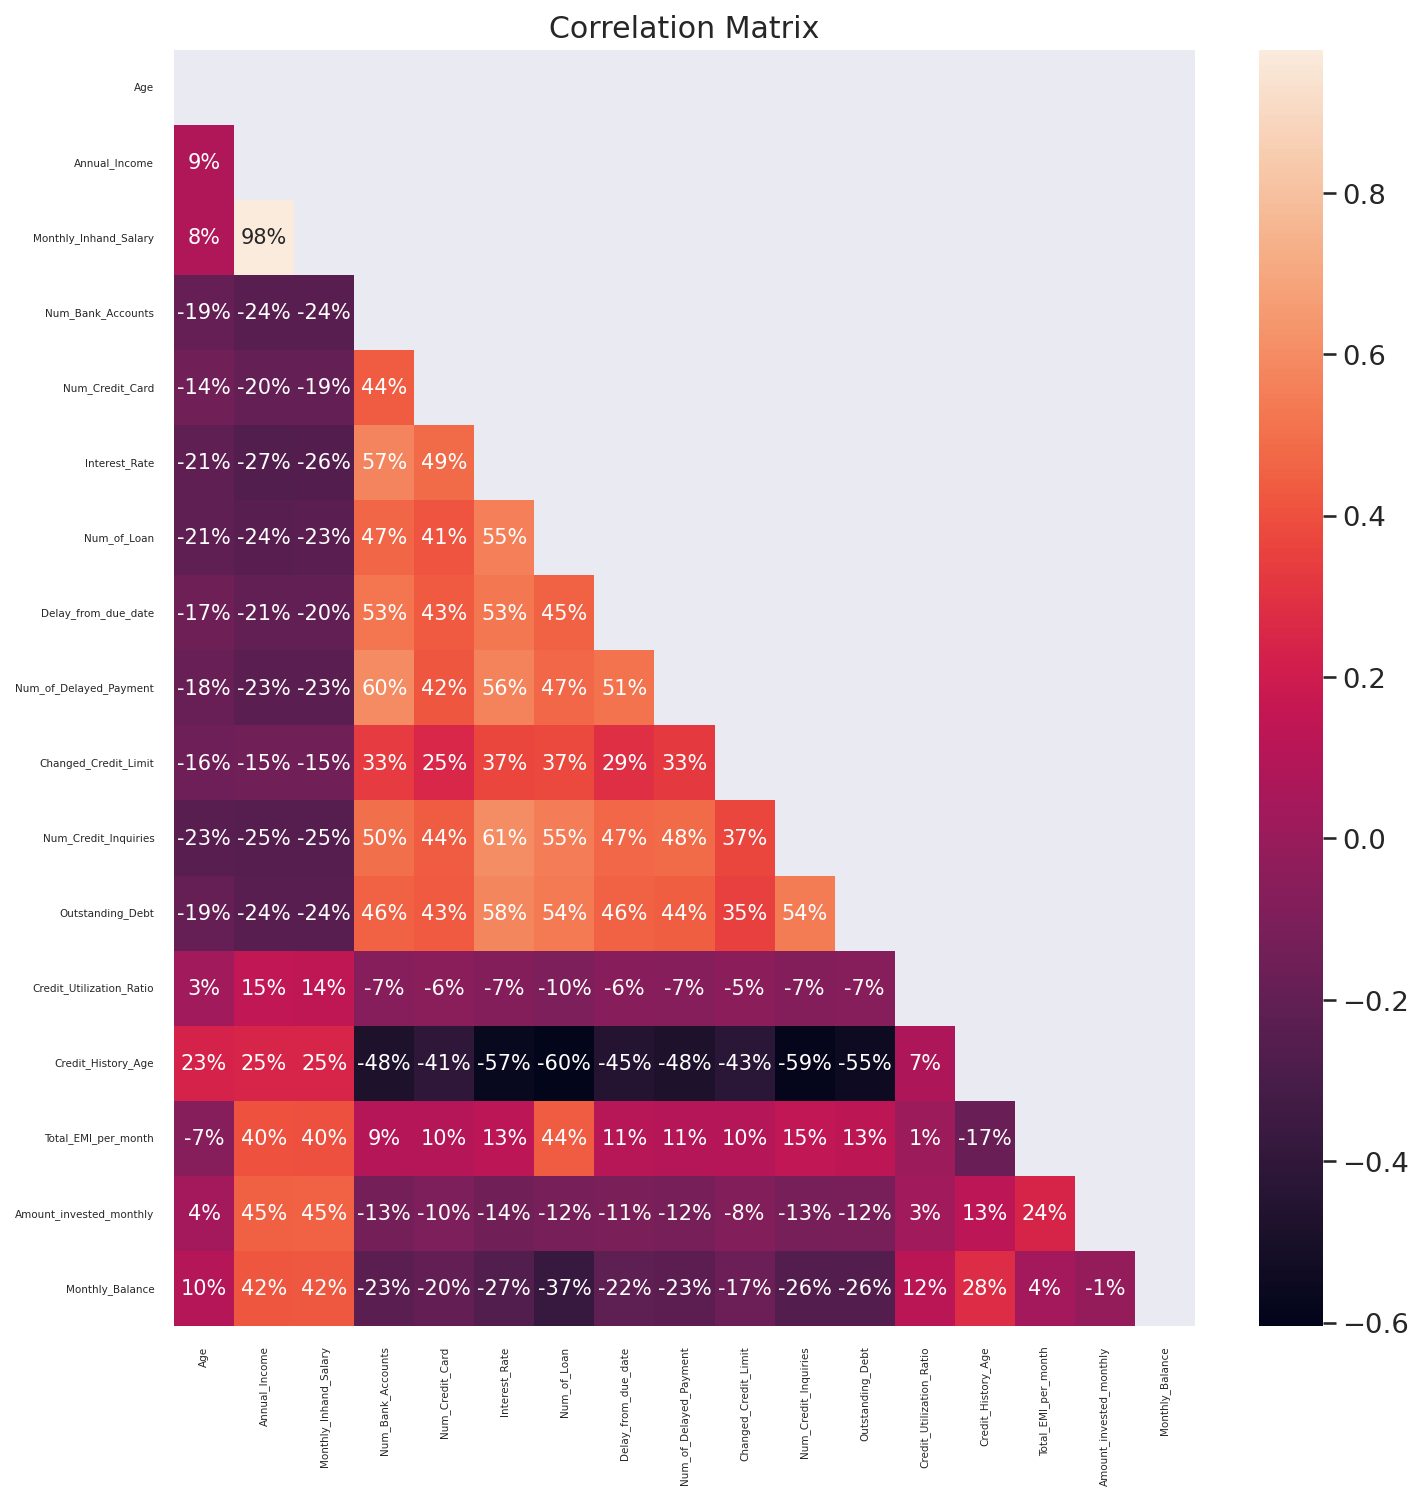

In [24]:
plot_correlation_matrix(new_df)


In [25]:
def feature_engineering(df):
    # Define mappings for categorical variables

    credit_score_mapping = {
        "Poor": 0,
        "Standard": 1,
        "Good": 2
    }

    credit_mix_mapping = {
        "Bad": 0,
        "Standard": 1,
        "Good": 2
    }

    min_amount_mapping = {
        "Yes": 1,
        "No": 0
    }

    # Replace categorical variables with mapped values
    df['Credit_Score'].replace(credit_score_mapping, inplace=True)
    df['Credit_Mix'].replace(credit_mix_mapping, inplace=True)
    df['Payment_of_Min_Amount'].replace(min_amount_mapping, inplace=True)

    # Perform one-hot encoding for selected categorical variables

    df = pd.get_dummies(df, columns=['Occupation', 'Payment_Behaviour'])

    # Drop unnecessary columns

    df = df.drop(['Customer_ID', 'Month', 'Type_of_Loan', 'is_train'], axis=1)

    return df

In [26]:
if "is_train" in new_df.columns:
    # Inspect the data type of the column
    print(new_df["is_train"].dtype)

    # Convert to boolean if necessary
    if new_df["is_train"].dtype == object:
        new_df["is_train"] = new_df["is_train"].map({'True': True, 'False': False})

    # Filter the DataFrame
    df = new_df[new_df["is_train"]]
    print(df.head())
else:
    print("Column 'is_train' does not exist in the DataFrame")

object
  Customer_ID     Month   Age Occupation  Annual_Income  \
0    CUS0xd40   January  23.0  Scientist       19114.12   
1    CUS0xd40  February  23.0  Scientist       19114.12   
2    CUS0xd40     March  34.0  Scientist       19114.12   
3    CUS0xd40     April  23.0  Scientist       19114.12   
4    CUS0xd40       May  23.0  Scientist       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            1824.843333                3.0              4.0            3.0   
1            1824.843333                3.0              4.0            3.0   
2            1824.843333                3.0              4.0            3.0   
3            1824.843333                3.0              4.0            3.0   
4            1824.843333                3.0              4.0            3.0   

   Num_of_Loan  ... Outstanding_Debt  Credit_Utilization_Ratio  \
0          4.0  ...           809.98                 26.822620   
1          4.0  ...           8

In [27]:
df = new_df[new_df["is_train"]]



In [28]:
df = feature_engineering(df)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Age                                             100000 non-null  float64
 1   Annual_Income                                   100000 non-null  float64
 2   Monthly_Inhand_Salary                           100000 non-null  float64
 3   Num_Bank_Accounts                               100000 non-null  float64
 4   Num_Credit_Card                                 100000 non-null  float64
 5   Interest_Rate                                   100000 non-null  float64
 6   Num_of_Loan                                     100000 non-null  float64
 7   Delay_from_due_date                             100000 non-null  float64
 8   Num_of_Delayed_Payment                          100000 non-null  float64
 9   Changed_Credit_Limit            

In [30]:
X, y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"]


In [31]:
y.value_counts(normalize=True)


Credit_Score
1    0.53174
0    0.28998
2    0.17828
Name: proportion, dtype: float64

In [32]:
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [33]:
y_data_rus.value_counts(normalize=True)


Credit_Score
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64

In [34]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

In [35]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)


In [36]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [37]:
# Define the models
models = {
    "Bagging": BaggingClassifier(n_jobs=-1),
    "ExtraTrees": ExtraTreesClassifier(max_depth=10, n_jobs=-1),
    "RandomForest": RandomForestClassifier(n_jobs=-1),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "XGB": XGBClassifier(n_jobs=-1),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

Bagging Classification Report:
                      0             1             2  accuracy     macro avg  \
precision      0.832741      0.800415      0.859507   0.83177      0.830888   
recall         0.866412      0.749937      0.878957   0.83177      0.831769   
f1-score       0.849243      0.774354      0.869123   0.83177      0.830907   
support    15952.000000  15952.000000  15953.000000   0.83177  47857.000000   

           weighted avg  
precision      0.830888  
recall         0.831770  
f1-score       0.830908  
support    47857.000000  


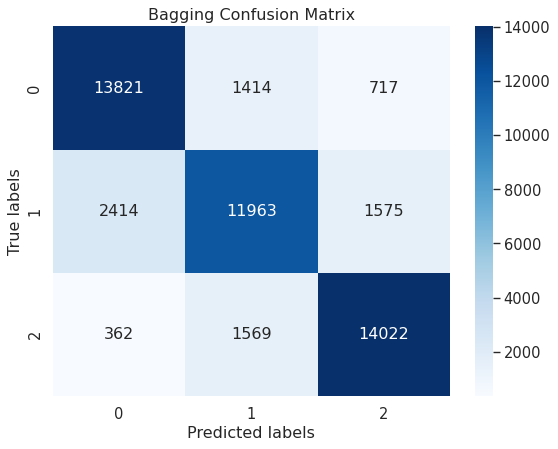

ExtraTrees Classification Report:
                      0             1             2  accuracy     macro avg  \
precision      0.754458      0.742103      0.698757  0.728295      0.731773   
recall         0.740033      0.581745      0.863098  0.728295      0.728292   
f1-score       0.747176      0.652212      0.772281  0.728295      0.723890   
support    15952.000000  15952.000000  15953.000000  0.728295  47857.000000   

           weighted avg  
precision      0.731772  
recall         0.728295  
f1-score       0.723891  
support    47857.000000  


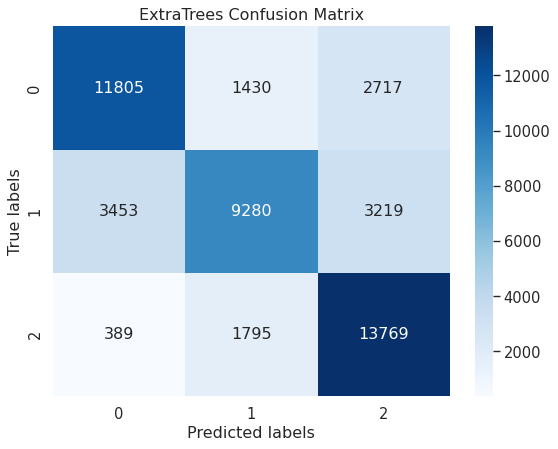

RandomForest Classification Report:
                      0             1             2  accuracy     macro avg  \
precision      0.860320      0.844553      0.849608  0.851704      0.851493   
recall         0.870675      0.760532      0.923901  0.851704      0.851703   
f1-score       0.865466      0.800343      0.885199  0.851704      0.850336   
support    15952.000000  15952.000000  15953.000000  0.851704  47857.000000   

           weighted avg  
precision      0.851493  
recall         0.851704  
f1-score       0.850337  
support    47857.000000  


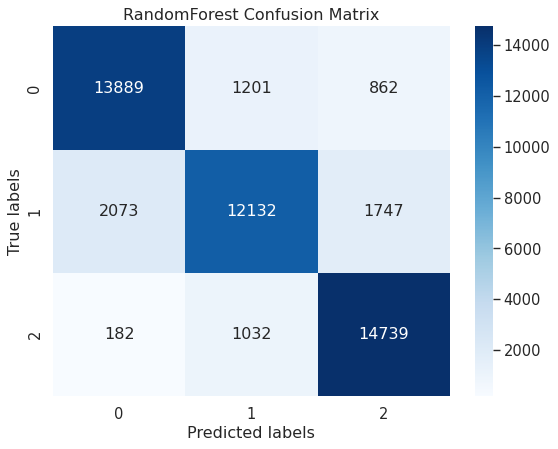

HistGradientBoosting Classification Report:
                      0             1             2  accuracy     macro avg  \
precision      0.832698      0.791268      0.802664  0.808722      0.808877   
recall         0.793756      0.725990      0.906413  0.808722      0.808720   
f1-score       0.812761      0.757225      0.851390  0.808722      0.807125   
support    15952.000000  15952.000000  15953.000000  0.808722  47857.000000   

           weighted avg  
precision      0.808877  
recall         0.808722  
f1-score       0.807126  
support    47857.000000  


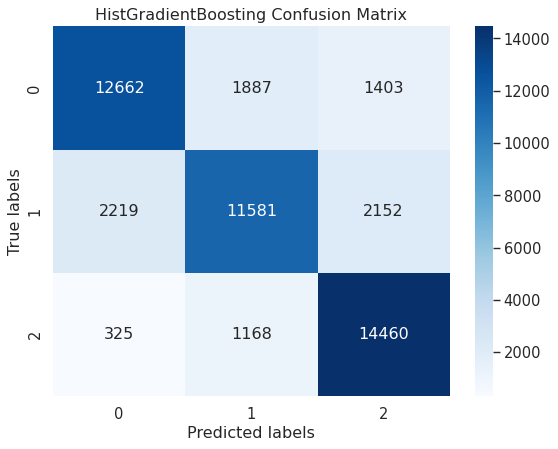

XGB Classification Report:
                      0             1             2  accuracy     macro avg  \
precision      0.847279      0.799571      0.830684  0.826379      0.825845   
recall         0.824599      0.746991      0.907541  0.826379      0.826377   
f1-score       0.835785      0.772387      0.867414  0.826379      0.825195   
support    15952.000000  15952.000000  15953.000000  0.826379  47857.000000   

           weighted avg  
precision      0.825845  
recall         0.826379  
f1-score       0.825196  
support    47857.000000  


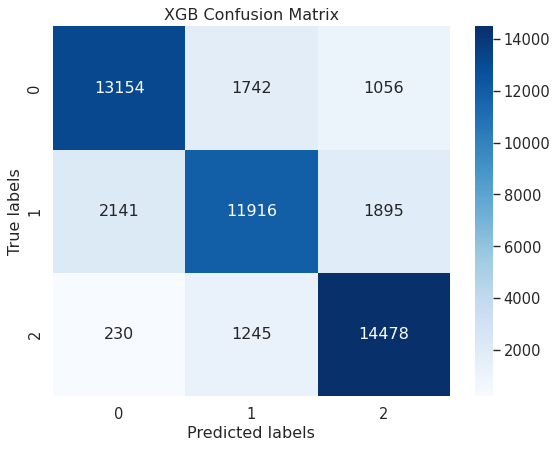

KNN Classification Report:
                      0             1             2  accuracy     macro avg  \
precision      0.778215      0.761616      0.828858   0.79117      0.789563   
recall         0.829927      0.668944      0.874632   0.79117      0.791168   
f1-score       0.803240      0.712278      0.851130   0.79117      0.788883   
support    15952.000000  15952.000000  15953.000000   0.79117  47857.000000   

           weighted avg  
precision      0.789564  
recall         0.791170  
f1-score       0.788884  
support    47857.000000  


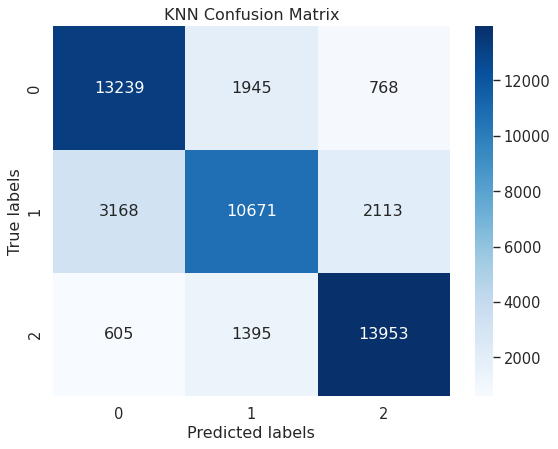

AdaBoost Classification Report:
                      0             1             2  accuracy     macro avg  \
precision      0.755745      0.754546      0.705798  0.734354      0.738696   
recall         0.688566      0.621678      0.892810  0.734354      0.734351   
f1-score       0.720593      0.681698      0.788365  0.734354      0.730219   
support    15952.000000  15952.000000  15953.000000  0.734354  47857.000000   

           weighted avg  
precision      0.738696  
recall         0.734354  
f1-score       0.730220  
support    47857.000000  


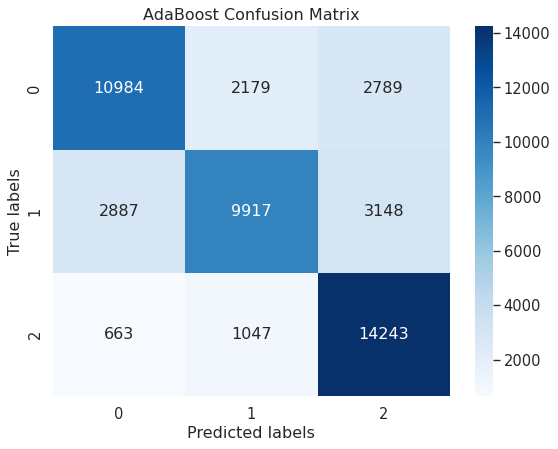

In [38]:
# Initialize dictionaries to store scores
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Iterate over each model
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report)

    # Store scores in dictionaries
    precision_scores[model_name] = report['weighted avg']['precision']
    recall_scores[model_name] = report['weighted avg']['recall']
    f1_scores[model_name] = report['weighted avg']['f1-score']

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Print the classification report for the model
    print(f"{model_name} Classification Report:")
    print(report_df)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

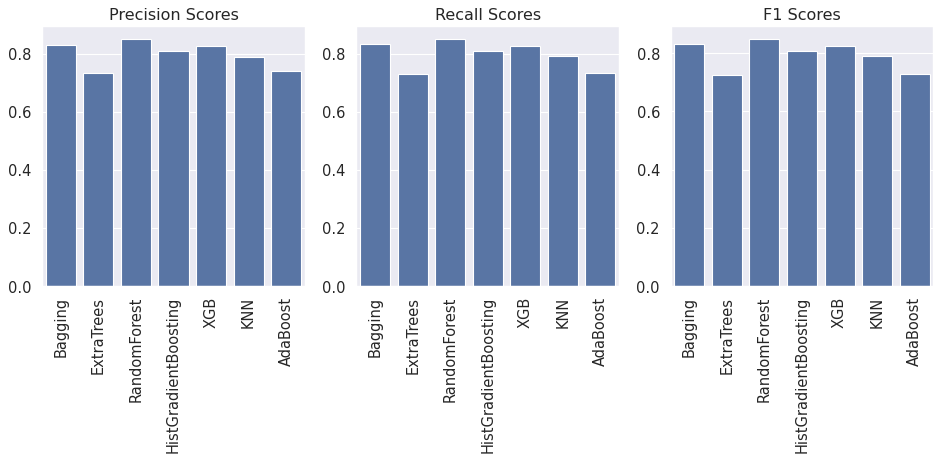

In [39]:
# Comparing Models
plt.figure(figsize=(12, 6))

# Precision Scores
plt.subplot(1, 3, 1)
sns.barplot(x=list(precision_scores.keys()), y=list(precision_scores.values()))
plt.title("Precision Scores")
plt.xticks(rotation=90)

# Recall Scores
plt.subplot(1, 3, 2)
sns.barplot(x=list(recall_scores.keys()), y=list(recall_scores.values()))
plt.title("Recall Scores")
plt.xticks(rotation=90)

# F1 Scores
plt.subplot(1, 3, 3)
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.title("F1 Scores")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [40]:
model = StackingClassifier(list(models.items()), n_jobs=-1)


In [45]:
model.fit(X_train, y_train)


StackingClassifier(estimators=[('Bagging', BaggingClassifier(n_jobs=-1)),
                               ('ExtraTrees',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('RandomForest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('HistGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=-1,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('KNN', KNeighborsClassifier()),
                               ('AdaBoost', AdaBoostClassifier())],
                   n_jobs=-1)

In [46]:
print("Train Score: ",model.score(X_train, y_train))


Train Score:  0.9989701338825953


In [47]:
print("Test Score: ",model.score(X_test, y_test))


Test Score:  0.8637607873456339


In [48]:
y_pred = model.predict(X_test)


In [49]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.87      0.87      0.87     15961
           1       0.80      0.82      0.81     15728
           2       0.91      0.90      0.91     16168

    accuracy                           0.86     47857
   macro avg       0.86      0.86      0.86     47857
weighted avg       0.86      0.86      0.86     47857



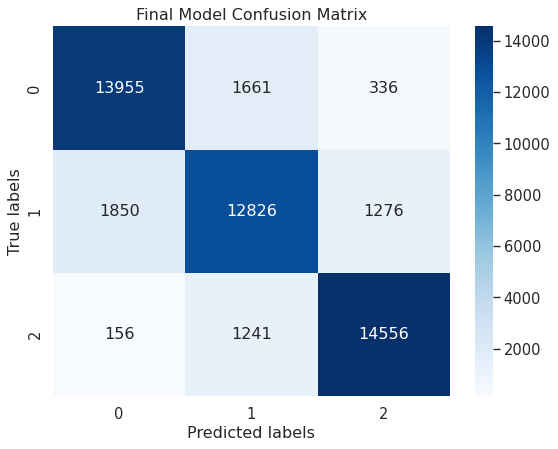

In [53]:
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Final Model Confusion Matrix')
    plt.show()

In [56]:
# Permutation Importances for HistGradientBoostingClassifier
models["HistGradientBoosting"].fit(X_train, y_train)
result = permutation_importance(models["HistGradientBoosting"], X_test, y_test, n_repeats=10, random_state=42)

In [57]:
hist_gb_feature_importance = result.importances_mean


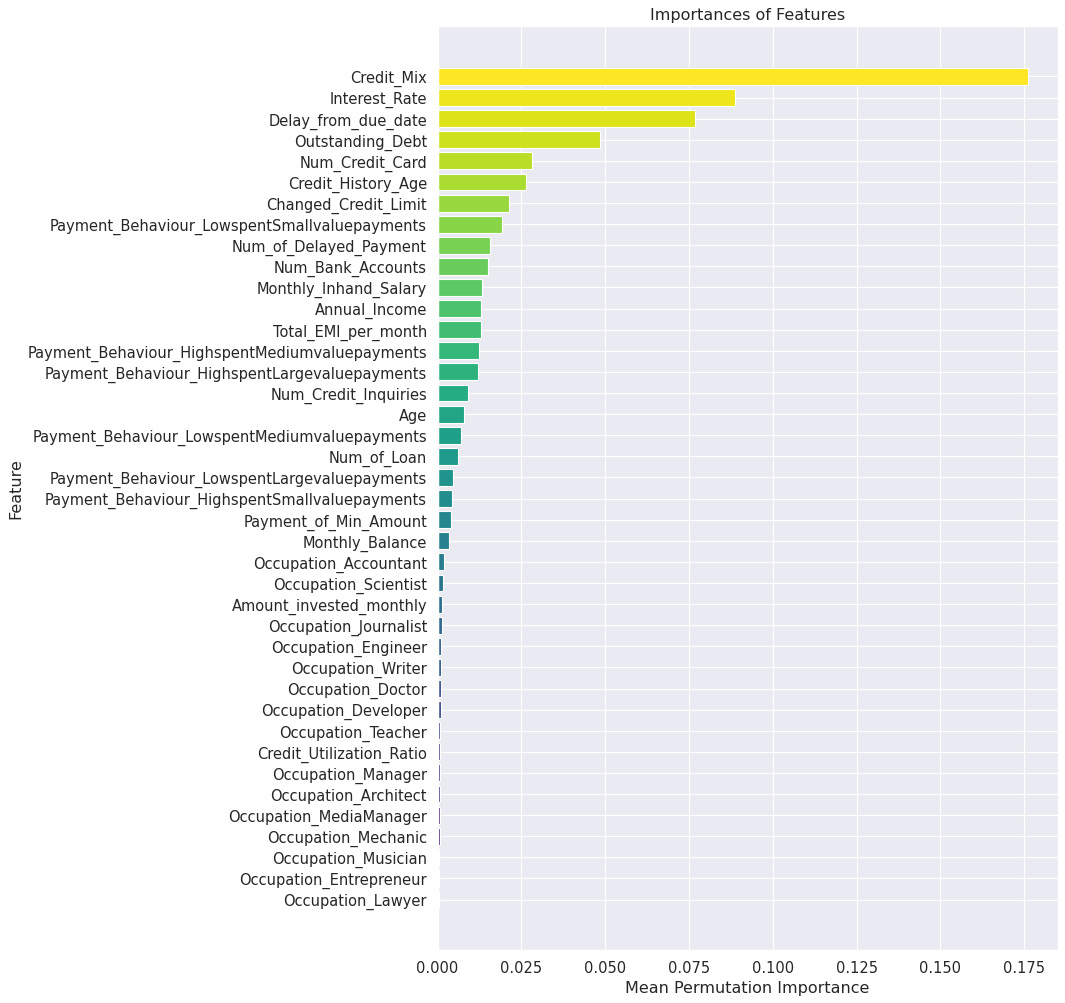

In [58]:
# Feature names
feature_names = df.drop("Credit_Score", axis=1).columns

# Sort feature importances and feature names together
sorted_indices = np.argsort(hist_gb_feature_importance)
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = hist_gb_feature_importance[sorted_indices]

# Choose colors for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_feature_names)))

# Plot permutation importances with colors and sorted order
plt.figure(figsize=(10, 15))
plt.barh(sorted_feature_names, sorted_importances, color=colors)
plt.xlabel('Mean Permutation Importance')
plt.ylabel('Feature')
plt.title('Importances of Features')
plt.show()

In [59]:
cross_tab = pd.crosstab(values=df["Monthly_Balance"], index=[
                        df["Credit_Score"], df["Credit_Mix"]], columns="Monthly_Balance", aggfunc="mean").reset_index()

main_group = pd.pivot_table(cross_tab, "Monthly_Balance", "Credit_Score", aggfunc=np.mean)
cross_tab

col_0,Credit_Score,Credit_Mix,Monthly_Balance
0,0,0,287.496216
1,0,1,330.466093
2,0,2,402.154168
3,1,0,278.749082
4,1,1,375.520867
5,1,2,396.714662
6,2,0,284.419754
7,2,1,375.099900
8,2,2,397.418036


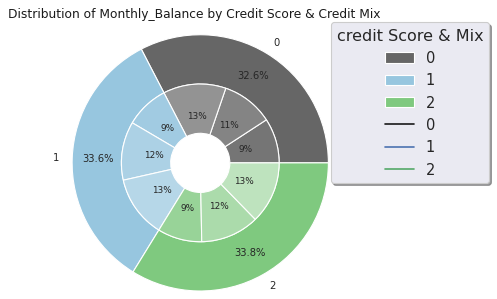

In [60]:
a = plt.cm.Accent
b = plt.cm.Blues

fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle("Distribution of Monthly_Balance by Credit Score & Credit Mix",
             fontsize=11,
             color="k")
fig.set_frameon(True)

pie1, *_, texts = ax.pie(x=main_group["Monthly_Balance"],
                         labels=main_group.index,
                         autopct="%.1f%%",
                         radius=1.3,
                         colors=[a(120, 1), b(100, 1),
                                 a(0, 1)],
                         pctdistance=0.8,
                         textprops={"size": 9},
                         frame=True)
plt.setp(pie1, width=0.5)
ax.set_frame_on(True)

pie2, *_, texts = ax.pie(x=cross_tab["Monthly_Balance"],
                         autopct="%.0f%%",
                         radius=0.8,colors=[
                             a(80, 0.9),
                             a(80, 0.8),
                             a(80, 0.7),
                             b(100, 0.9),
                             b(100, 0.8),
                             b(100, 0.7),
                             a(0, 0.8),
                             a(0, 0.65),
                             a(0, 0.5)
],
    textprops={"size": 8})
plt.setp(pie2, width=0.5)
legend_labels = np.unique(cross_tab["Credit_Mix"])

legend_handles = [
    plt.plot([], label=legend_labels[0], c="k"),
    plt.plot([], label=legend_labels[1], c='b'),
    plt.plot([], label=legend_labels[-1], c="g")
]
plt.legend(shadow=True,
           frameon=True,
           facecolor="inherit",
           loc="best",title="credit Score & Mix",
           bbox_to_anchor=(1, 1, 0.5, 0.1))

plt.show()

In [61]:
df_test = new_df[~new_df["is_train"]]


In [62]:
df_test = feature_engineering(df_test)


In [63]:
df_test.drop(["Credit_Score"], axis=1, inplace=True, errors="ignore")


In [64]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age                                             50000 non-null  float64
 1   Annual_Income                                   50000 non-null  float64
 2   Monthly_Inhand_Salary                           50000 non-null  float64
 3   Num_Bank_Accounts                               50000 non-null  float64
 4   Num_Credit_Card                                 50000 non-null  float64
 5   Interest_Rate                                   50000 non-null  float64
 6   Num_of_Loan                                     50000 non-null  float64
 7   Delay_from_due_date                             50000 non-null  float64
 8   Num_of_Delayed_Payment                          50000 non-null  float64
 9   Changed_Credit_Limit                        

In [65]:
X_test_processed = scalar.transform(df_test.values)


In [66]:
y_pred_test = model.predict(X_test_processed)


In [67]:
df_test['Predicted_Credit_Score'] = y_pred_test


In [68]:
df_test.head(10)


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Predicted_Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,True,False,False,False,False,False,False,False,True,2
1,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,9.0,13.27,...,True,False,False,False,True,False,False,False,False,2
2,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,12.27,...,True,False,False,False,False,False,False,True,False,2
3,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,4.0,5.0,11.27,...,True,False,False,False,True,False,False,False,False,2
4,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,1.0,5.42,...,False,True,False,True,False,False,False,False,False,2
5,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,3.0,5.42,...,False,True,False,False,False,False,True,False,False,2
6,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,2.5,5.42,...,False,True,False,True,False,False,False,False,False,2
7,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,2.0,7.42,...,False,True,False,True,False,False,False,False,False,2
8,35.0,143162.64,12187.220000,1.0,5.0,8.0,3.0,8.0,14.0,7.10,...,False,False,False,False,False,False,False,True,False,1
9,35.0,143162.64,12187.220000,1.0,5.0,8.0,3.0,6.0,3.0,2.10,...,False,False,False,False,False,False,True,False,False,2
